In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [11]:
I = cv2.imread('forest.jpg')
histSize = 256
histRange = (0,256)
I_BGR = cv2.split(I)
bHist = cv2.calcHist(I_BGR, [0], None, [histSize], histRange)
gHist = cv2.calcHist(I_BGR, [1], None, [histSize], histRange)
rHist = cv2.calcHist(I_BGR, [2], None, [histSize], histRange)

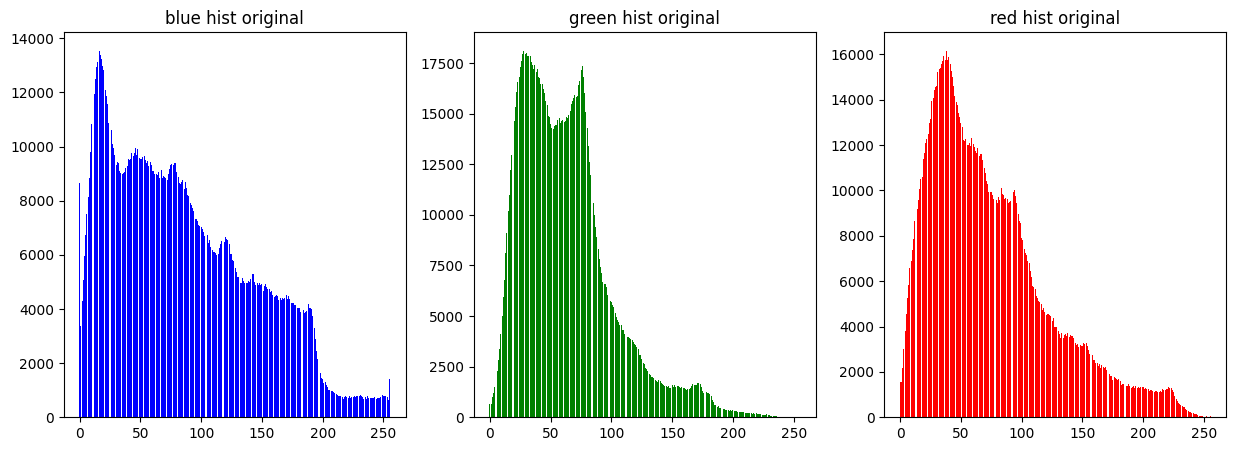

In [12]:
x = list(range(256))
fig, ax = plt.subplots(1, 3, figsize=(15,5))
ax[0].bar(x, bHist[:,0], color='b')
ax[1].bar(x, gHist[:,0], color='g')
ax[2].bar(x, rHist[:,0], color='r')
ax[0].set_title('blue hist original')
ax[1].set_title('green hist original')
ax[2].set_title('red hist original')
plt.show()

Text(0.5, 1.0, 'Original')

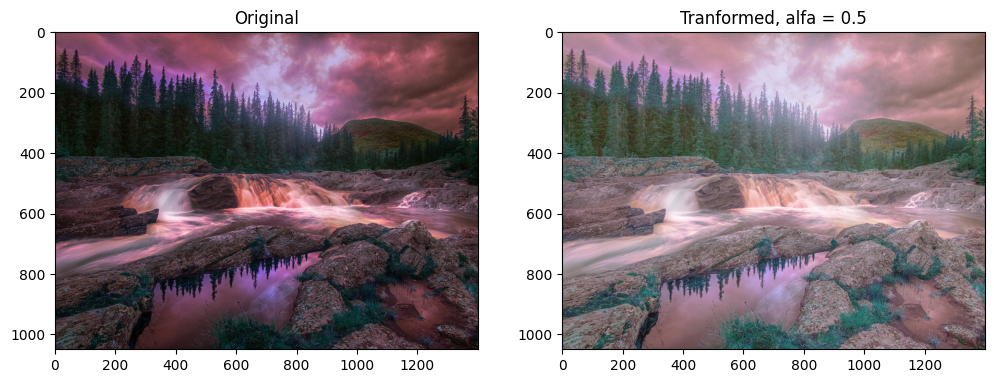

In [13]:
alfa = 0.5
# Convert to floating point
if I.dtype == np.uint8 :
    Inew = I.astype(np.float32) / 255
else :
    Inew = I

# We need to process layers separately
I_BGR = cv2.split(Inew)
Inew_BGR = []

for layer in I_BGR:
    Imin = layer.min()
    Imax = layer.max()
    Inew = np.clip(( ((layer - Imin) / (Imax - Imin)) ** alfa ), 0 , 1)
    Inew_BGR.append(Inew)
# Merge back
Inew = cv2.merge(Inew_BGR)
# Convert back to uint if needed
if (I.dtype == np.uint8):
    Inew = (255 * Inew).clip(0 , 255).astype(np.uint8)

f, ax = plt.subplots(1,2, figsize=(12,12))
ax[1].imshow(Inew)
ax[1].set_title(f'Tranformed, alfa = {alfa}')
ax[0].imshow(I)
ax[0].set_title('Original')

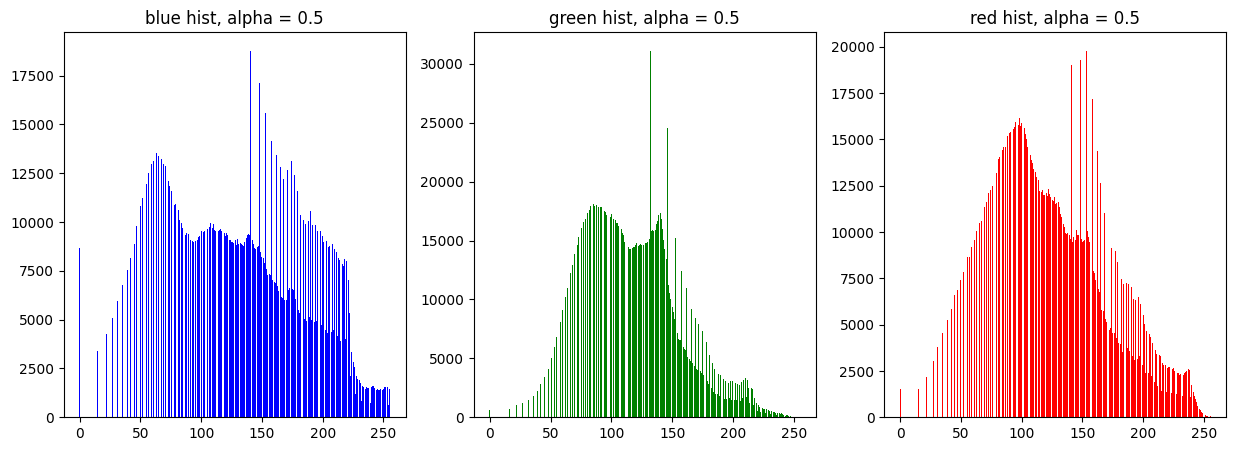

In [10]:
histSize = 256
histRange = (0,256)
I_BGR = cv2.split(Inew)
bHist_a = cv2.calcHist(I_BGR, [0], None, [histSize], histRange)
gHist_a = cv2.calcHist(I_BGR, [1], None, [histSize], histRange)
rHist_a = cv2.calcHist(I_BGR, [2], None, [histSize], histRange)
x = list(range(256))
fig, ax = plt.subplots(1, 3, figsize=(15,5))
ax[0].bar(x, bHist_a[:,0], color='b')
ax[1].bar(x, gHist_a[:,0], color='g')
ax[2].bar(x, rHist_a[:,0], color='r')
ax[0].set_title(f'blue hist, alpha = {alfa}')
ax[1].set_title(f'green hist, alpha = {alfa}')
ax[2].set_title(f'red hist, alpha = {alfa}')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


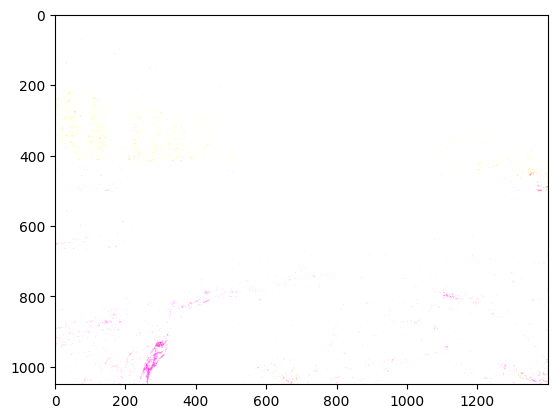

In [39]:
CHb = np.cumsum(bHist) / (I.shape[0] * I.shape[1])
CHb = CHb[:, np.newaxis]
CHg = np.cumsum(gHist) / (I.shape[0] * I.shape[1])
CHg = CHg[:, np.newaxis]
CHr = np.cumsum(rHist) / (I.shape[0] * I.shape[1])
CHr = CHr[:, np.newaxis]
CH = np.concatenate([CHb, CHg, CHr], axis=1)

I = cv2.imread('forest.jpg')
I_BGR = cv2.split(I)
Inew_BGR = []

for i, layer in enumerate(I_BGR):
    Imin = layer.min()
    Imax = layer.max()
    Inew = np.clip((Imax-Imin)*CH[layer[:,:],i] , 0, 255)
    Inew_BGR.append(Inew)
# Merge back
Inew = cv2.merge(Inew_BGR)
# Convert back to uint if needed
plt.imshow(Inew)

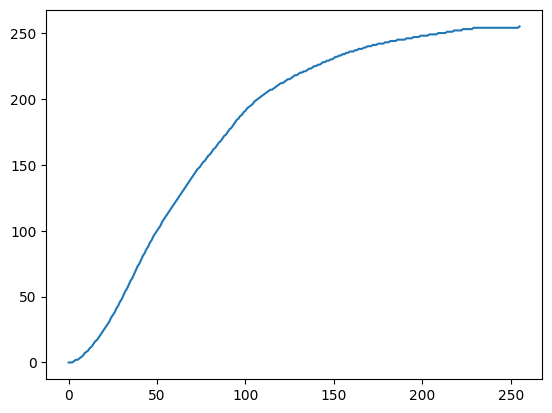

In [37]:
plt.plot(CHr[:,0])